In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('/workspace/Eval/')
from counterfactual_explanation.utils.helpers import (
    load_all_configuration_with_data_name, load_configuration_from_yaml)
from torch import nn
import pandas as pd
import numpy as np
import torch
import json
from config.config import Config
import config.setup as setup
from tqdm import tqdm_notebook as tqdm
import glob
args = setup.setup(Config)
CONFIG_PATH = '/workspace/Eval/configuration/data_catalog.yaml'
CONFIG_FOR_PROJECT = '/workspace/Eval/configuration/project_configurations.yaml'
TEST_INPUT = '/workspace/Eval/configuration/test_input.yaml'
data_config = load_configuration_from_yaml(CONFIG_PATH)
configuration_for_proj = load_configuration_from_yaml(CONFIG_FOR_PROJECT)

/root/.local/share/virtualenvs/workspace-dqq3IVyd/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
temperature_dict = json.load(open('/workspace/Eval/npy/temperature_dict.json', 'r'))
dice_dict = json.load(open('/workspace/Eval/npy/dice_diversity_temperature_dict.json', 'r'))

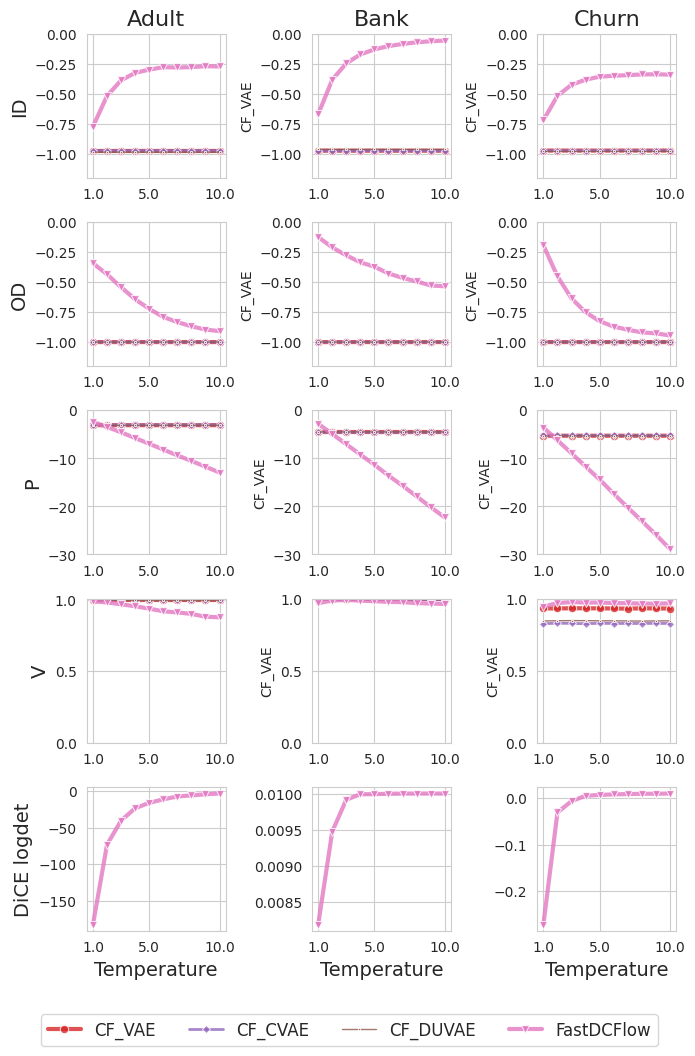

In [14]:
data_names = ['inner_diversity', 'outer_diversity', 'proximity', 'validity']
sns.set_style("whitegrid")
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(7, 10))  # nrowsとncolsを入れ替え
x = range(10)
ts = range(1, 11)
colors = sns.color_palette(n_colors=7)[3:]
color_pink = sns.color_palette(n_colors=7)[6:]
for i, data_name in enumerate(data_names):
    data_df = pd.DataFrame()
    for j, metrics in enumerate(['adult', 'bank', 'churn']):  # metricsをdatasetに入れ替え
        data_df = pd.DataFrame({
            'CF_VAE': temperature_dict[metrics][data_name][0],  # metricsとdata_nameの位置を入れ替え
            'CF_CVAE': temperature_dict[metrics][data_name][1],  # 同上
            'CF_DUVAE': temperature_dict[metrics][data_name][2],  # 同上
            'FastDCFlow': temperature_dict[metrics][data_name][3],  # 同上
        })
        # line = sns.lineplot(data=data_df, ax=axes[i, j], linewidth=3.0, dashes=False, markers=['o', 'D', 's', 'v'], markersize=6, alpha=0.8, palette=colors)
        for k, column in enumerate(data_df.columns):
                line = sns.lineplot(data=data_df[column], ax=axes[i, j], label=column,
                            linewidth=[3, 2, 1, 3][k], dashes=False, marker=['o', 'D', 's', 'v'][k], 
                            markersize=[6, 4, 2, 6][k], alpha=0.8, color=colors[k])
        if i == 0 and j == 0:
            # 一度だけラインオブジェクトとラベルを取得
            lines = line.get_lines()
            labels = [l.get_label() for l in lines]
        if i == 0:  # jが列、iが行になるように調整
            if j == 0:
                axes[i, j].set_title('Adult', fontsize=16)
            elif j == 1:
                axes[i, j].set_title('Bank', fontsize=16)
            elif j == 2:
                axes[i, j].set_title('Churn', fontsize=16)
            axes[i, j].set_ylim(-32, 0)
        if i == 3:
            axes[i, j].set_yticks([0, 0.5, 1.0])
        if i == 2:
            axes[i, j].set_ylim(-30, 0)                  
        if i == 0:
            axes[i, j].set_ylim(-1.2, 0)
            # axes[i, j].set_yticks([0, 10, 20])
            pass     
        if j == 0:  # iが列、jが行になるように調整
            if i == 2:
                axes[i, j].set_ylabel('P', fontsize=14)
            elif i == 3:
                axes[i, j].set_ylabel('V', fontsize=14)
            elif i == 0:
                axes[i, j].set_ylabel('ID', fontsize=14)
            elif i == 1:
                axes[i, j].set_ylabel('OD', fontsize=14)
        if i == 1:
            axes[i, j].set_ylim(-1.2, 0)
            #axes[i, j].set_yticks([0, 10, 20])
            pass            
        axes[i, j].set_xticks([0, 4, 9], [1.0, 5.0, 10.0])
        # 凡例の位置を調整
        axes[i, j].legend([], [], frameon=False, fontsize=14)

for j, metrics in enumerate(['adult', 'bank', 'churn']):  # metricsをdatasetに入れ替え
    data_df = pd.DataFrame({
        'FastDCFlow': [np.mean(lst) for lst in dice_dict[metrics]['det_score']],  # 同上
        })
    line = sns.lineplot(data=data_df, ax=axes[4, j], linewidth=3.0, dashes=False, markers=['v'], markersize=6, alpha=0.8, palette=color_pink)
    if j == 0:
        axes[4, j].set_ylabel('DiCE logdet', fontsize=14)
    axes[4, j].set_xlabel('Temperature', fontsize=14)
    axes[4, j].set_xticks([0, 4, 9], [1.0, 5.0, 10.0])
    axes[4, j].legend([], [], frameon=False, fontsize=14)

plt.tight_layout()
fig.legend(lines, labels, loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.06), fontsize=12)
plt.show()

In [19]:
[np.mean(lst) for lst in dice_dict['churn']['det_score']]

[-0.27171883383765816,
 -0.03091816759784706,
 -0.006703932265518233,
 0.004910269120009616,
 0.0066808622470125555,
 0.007903587938053534,
 0.008526681585935876,
 0.009227058654651045,
 0.00922834592871368,
 0.009754129382781685]

実行時間比較

In [22]:
data_list_1_1 = [57.90456, 215.75628, 510.07633, 903.00646, 1411.08879]
data_list_2_1 = [52.50480, 101.81384, 153.93214, 202.30371, 253.72362]
data_list_3_1 = [51.42848, 102.51081, 167.46084, 231.46711, 301.19121]
data_list_4_1 = [11.26096, 11.24905, 11.24781, 11.24788, 11.24795]
data_list_5_1 = [13.55102, 13.55215, 13.55143, 13.55132, 13.55244]
data_list_6_1 = [12.26387, 12.25187, 12.25376, 12.25229, 12.25407]
data_list_7_1 = [37.85176, 37.85858, 37.86005, 37.86714, 37.86528]  # 0.06706

data_list_1_2 = [57.77388, 217.63959, 511.10883, 910.78253, 1415.05990]
data_list_2_2 = [77.98528, 155.37686, 231.00868, 308.85951, 381.31227]
data_list_3_2 = [50.21328, 101.49093, 157.40136, 219.97825, 286.69460]
data_list_4_2 = [2.16409, 2.16603, 2.16429, 2.16515, 2.16565]
data_list_5_2 = [2.90953, 2.91008, 2.91035, 2.90997, 2.91166]
data_list_6_2 = [2.48340, 2.48394, 2.48408, 2.48405, 2.48424]
data_list_7_2 = [7.14835, 7.15199, 7.18280, 7.15527, 7.15707]

data_list_1_3 = [58.12555, 227.29899, 505.62663, 896.01885, 1427.94764]
data_list_2_3 = [86.43155, 172.34585, 253.59653, 339.00693, 421.41361]
data_list_3_3 = [52.64715, 104.30428, 166.18773, 228.87060, 298.46397]
data_list_4_3 = [3.85711, 3.86724, 3.85737, 3.86312, 3.85904]
data_list_5_3 = [0.00964, 0.00566, 0.03719, 0.05113, 0.00531]
data_list_6_3 = [2.80408, 2.80455, 2.81580, 2.80513, 2.80538]
data_list_7_3 = [7.36647, 7.37041, 7.37216, 7.37479, 7.37926]


dice = [data_list_1_1, data_list_1_2, data_list_1_3]
ga = [data_list_2_1, data_list_2_2, data_list_2_3]
moga = [data_list_3_1, data_list_3_2, data_list_3_3]
vae = [data_list_4_1, data_list_4_2, data_list_4_3]
cvae = [data_list_5_1, data_list_5_2, data_list_5_3]
duvae = [data_list_6_1, data_list_6_2, data_list_6_3]
flow = [data_list_7_1, data_list_7_2, data_list_7_3]

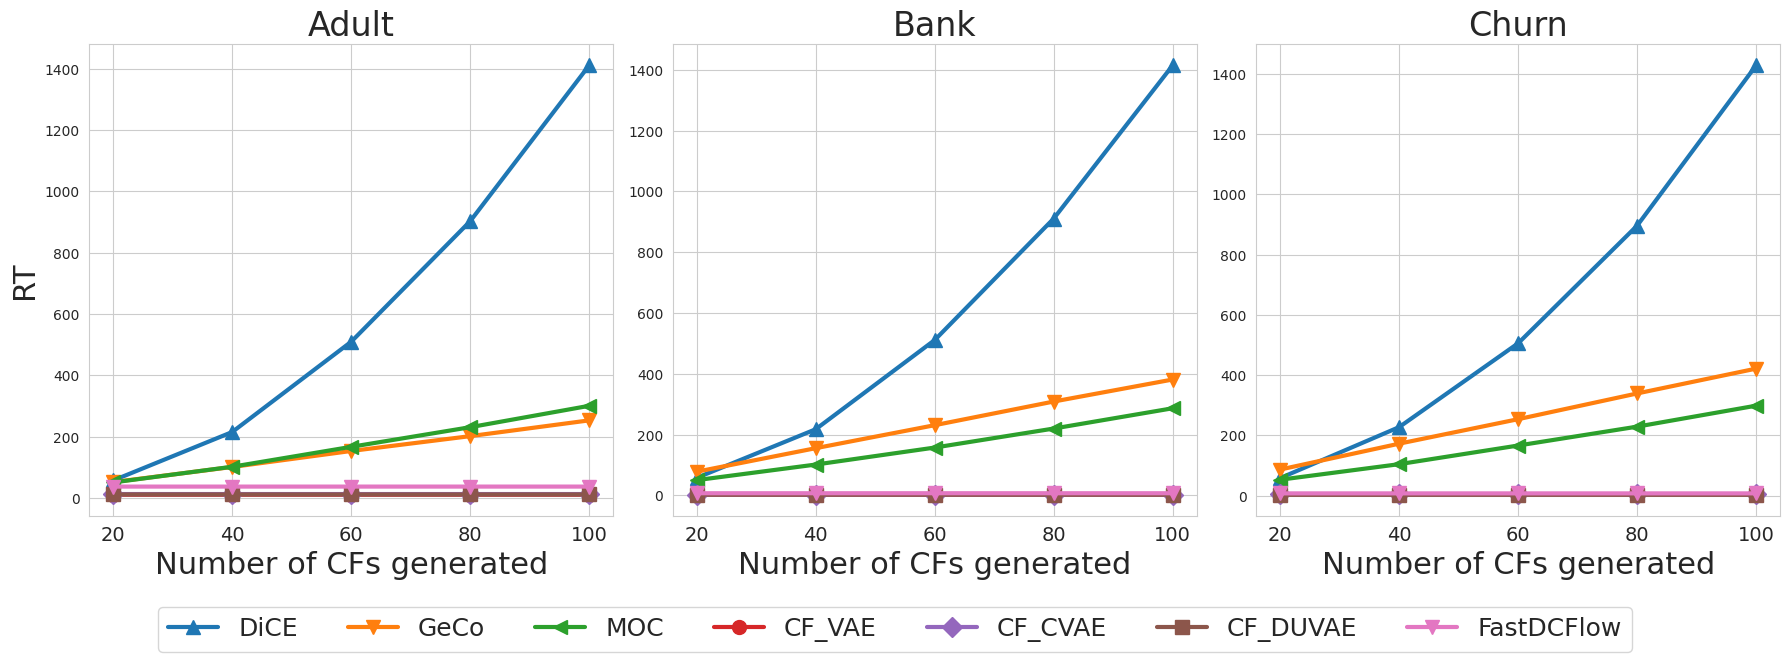

In [33]:
import matplotlib.lines as mlines

colors = sns.color_palette(n_colors=7) #seabornのデフォルトカラーパレット
markers = ['^', 'v', '<', 'o', 'D', 's', 'v']
labels = ['DiCE', 'GeCo', 'MOC', 'CF_VAE', 'CF_CVAE', 'CF_DUVAE', 'FastDCFlow']
DATA_NAMES = ['Adult', 'Bank', 'Churn']

sns.set_style("whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
x = np.arange(5)

for i, data in enumerate(zip(dice, ga, moga, vae, cvae, duvae, flow)):
    dice_i, ga_i, moga_i, vae_i, cvae_i, duvae_i, flow_i = data
    time_data = [dice_i, ga_i, moga_i, vae_i, cvae_i, duvae_i, flow_i]

    for j, (color, marker, label, time) in enumerate(zip(colors, markers, labels, time_data)):
        axes[i].plot(x, time, color=color, marker=marker, linestyle='-', linewidth=3, markersize=10, label=label if i == 0 else None)
        
    axes[i].set_title(f'{DATA_NAMES[i]}', fontsize=24)
    axes[i].set_xlabel('Number of CFs generated', fontsize=22)

    if i==0:
        axes[i].set_ylabel('RT', fontsize=22)

    axes[i].set_xticks(x)
    axes[i].set_xticklabels([20, 40, 60, 80, 100], fontsize=14)

# プロット外に凡例を作成します
fig.legend(loc="lower center",   # 凡例の位置
           borderaxespad=0.1,    # 軸と凡例の間のパッド
           bbox_to_anchor=(0.5, -0.1),
           fontsize=18, # 凡例のフォントサイズ
           ncol=7) # 横に並べる凡例の数

plt.tight_layout()
plt.show()

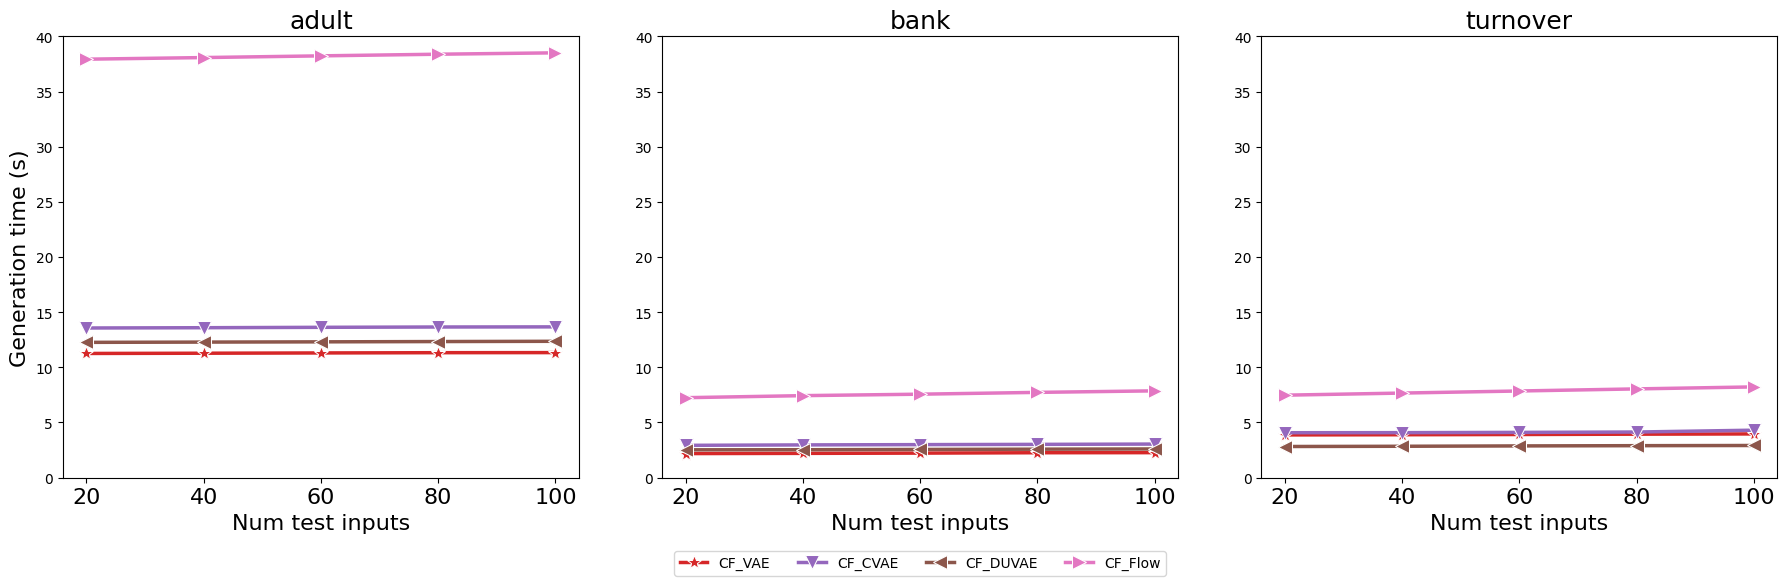

In [21]:
DATA_NAMES = ['adult', 'bank', 'turnover']
dice = np.array(dice)
ga = np.array(ga)
moga = np.array(moga)
vae = np.array(vae)
cvae = np.array(cvae)
duvae = np.array(duvae)
flow = np.array(flow)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
x = range(5)

color_list = ['tab:red', 'tab:purple', 'tab:brown', 'tab:pink']
markers=['*', 'v', '<', '>']
methods = ['CF_VAE', 'CF_CVAE', 'CF_DUVAE', 'CF_Flow']

for i, data in enumerate(zip(dice, ga, moga, vae, cvae, duvae, flow)):
    dice_i, ga_i, moga_i, vae_i, cvae_i, duvae_i, flow_i = data
    
    time_df = pd.DataFrame({
    methods[0]: vae_i,
    methods[1]: cvae_i,
    methods[2]: duvae_i,
    methods[3]: flow_i
    })
    
    for j, method in enumerate(methods):
        sns.lineplot(data=time_df[method], ax=axes[i], linewidth=2.5, dashes=False, marker=markers[j], color=color_list[j], markersize=10, label=method)
    
    axes[i].set_title(f'{DATA_NAMES[i]}', fontsize=18)
    axes[i].set_xlabel('Num test inputs', fontsize=16)
    axes[i].set_ylim(0, 40)
    if i==0:
        axes[i].set_ylabel('Generation time (s)', fontsize=16)
    else:
        axes[i].set_ylabel('')
    axes[i].set_xticks(x, [20, 40, 60, 80, 100], fontsize=16)
    # 凡例の位置を調整
    if i == 1:
        axes[i].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)
    else:
        axes[i].legend([], [], frameon=False)
plt.tight_layout()
plt.show()

In [ ]:
# np.save(configuration_for_proj['cfs_cf_flow_npy'] + 'times_dice.npy', dice)
# np.save(configuration_for_proj['cfs_cf_flow_npy'] + 'times_ga.npy', ga)
# np.save(configuration_for_proj['cfs_cf_flow_npy'] + 'times_moga.npy', moga)
# np.save(configuration_for_proj['cfs_cf_flow_npy'] + 'times_vae.npy', vae)
# np.save(configuration_for_proj['cfs_cf_flow_npy'] + 'times_cvae.npy', cvae)
# np.save(configuration_for_proj['cfs_cf_flow_npy'] + 'times_duvae.npy', duvae)
# np.save(configuration_for_proj['cfs_cf_flow_npy'] + 'times_flow.npy', flow)

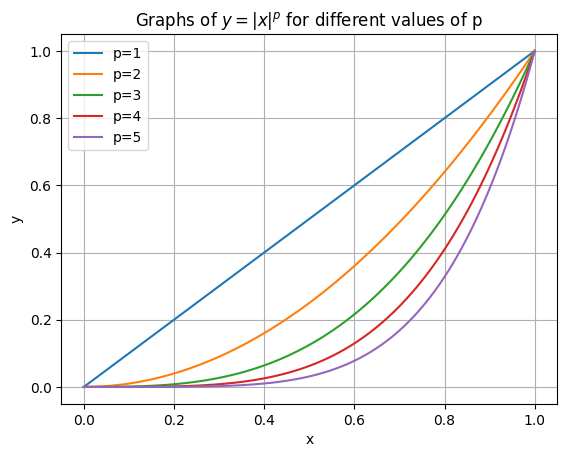

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# xの値を0から1まで生成
x_values = np.linspace(0, 1, 100)  # 0から1までの値を100個生成する

# pの値を設定
p_values = [1, 2, 3, 4, 5]

# 各p値に対してグラフをプロット
for p in p_values:
    y_values = np.abs(x_values) ** p  # 絶対値は必要ありませんが、定義に沿っています
    plt.plot(x_values, y_values, label=f'p={p}')

# グラフのタイトルと軸ラベルを設定
plt.title('Graphs of $y = |x|^p$ for different values of p')
plt.xlabel('x')
plt.ylabel('y')

# 凡例を表示
plt.legend()

# グリッドを表示
plt.grid(True)

# グラフを表示
plt.show()
